# Capstone Workbook 4: Initial Modelling 2

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Import data 
airbnb_ldn = pd.read_csv('airbnb_ldn_pp.csv')

In [10]:
# drop 'Unnamed: 0'
airbnb_ldn = airbnb_ldn.drop(columns = 'Unnamed: 0')

In [11]:
airbnb_ldn.shape

(32678, 48)

For this inital modelling, a linear regression model will be used. This model will determine the qualities of the various numerical columns in determining the target variable 'Annual Revenue LTM'.

In [17]:
num_cols = airbnb_ldn.select_dtypes(exclude='object')

In [18]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32678 entries, 0 to 32677
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Number of Reviews                                  32678 non-null  int64  
 1   Bedrooms                                           32678 non-null  float64
 2   Bathrooms                                          32678 non-null  int64  
 3   Max Guests                                         32678 non-null  int64  
 4   Airbnb Superhost                                   32678 non-null  int64  
 5   Cleaning Fee (Native)                              32678 non-null  float64
 6   Extra People Fee(Native)                           32678 non-null  float64
 7   Minimum Stay                                       32678 non-null  int64  
 8   Latitude                                           32678 non-null  float64
 9   Longit

Now the dataframe has been imported and numerical variables separated, a few additional checks will be complete.

Null values in main columns have been dealt with in previous workbooks. Some null values were not addressed, these will be evaluated now.

In [21]:
num_cols.isnull().sum()

Number of Reviews                                        0
Bedrooms                                                 0
Bathrooms                                                0
Max Guests                                               0
Airbnb Superhost                                         0
Cleaning Fee (Native)                                    0
Extra People Fee(Native)                                 0
Minimum Stay                                             0
Latitude                                                 0
Longitude                                                0
Overall Rating                                           0
Airbnb Communication Rating                              0
Airbnb Accuracy Rating                                   0
Airbnb Checkin Rating                                    0
Airbnb Location Rating                                   0
Airbnb Value Rating                                      0
Airbnb Host ID                                          

There is one column that contain null values, 'Host Listing Count'. This column will be dropped.

In [22]:
# drop specified column:
num_cols.drop(columns='Host Listing Count', inplace=True)

In [24]:
# confirm whether there are any null values left in the dataframe:
num_cols.isnull().any().any()

False

The data is now ready for modelling. First, the dataframe will be split between in the multiple independent variables and the target variable 'Annual Revenue LTM (Native)':

In [25]:
# split the data between X and y variables:
X = num_cols.drop(columns = 'Annual Revenue LTM (Native)')
y = num_cols['Annual Revenue LTM (Native)']

A first basic model will be used, to gauge the effectivenss of a linear regression model using the various independent variables and target variable.

In [29]:
# import 
from scipy import stats
import statsmodels.api as sm

### Model 1: Create initial linear regression model with all independent variables

In [39]:
# Need to add a constant to the independent variables 
X_withconstant = sm.add_constant(X)

In [41]:
# 1. Instantiate model
linreg = sm.OLS(y, X_withconstant)

# 2. Fit model
linreg_results = linreg.fit()

# Look at model summary
linreg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Annual Revenue LTM (Native)   R-squared:                       0.698
Model:                                     OLS   Adj. R-squared:                  0.698
Method:                          Least Squares   F-statistic:                     2158.
Date:                         Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                                 22:24:56   Log-Likelihood:            -3.5161e+05
No. Observations:                        32678   AIC:                         7.033e+05
Df Residuals:                            32642   BIC:                         7.036e+05
Df Model:                                   35                                         
Covariance Type:                     nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                 0.1742      1.224      0.142      0.887      -2.225       2.573
Number of Reviews                                   -23.2607      1.363    -17.066      0.000     -25.932     -20.589
Bedrooms                                           -268.6228    124.972     -2.149      0.032    -513.572     -23.674
Bathrooms                                           230.3820    114.153      2.018      0.044       6.638     454.126
Max Guests                                          753.6125     57.126     13.192      0.000     641.644     865.581
Airbnb Superhost                                    550.0229    158.162      3.478      0.001     240.020     860.025
Cleaning Fee (Native)                                40.8539      1.974     20.693      0.000      36.984      44.724
Extra People Fee(Native)                            -21.8212      8.179     -2.668      0.008     -37.853      -5.789
Minimum Stay                                         -8.2920      3.671     -2.259      0.024     -15.488      -1.096
Latitude                                           -403.2967   1582.129     -0.255      0.799   -3504.328    2697.735
Longitude                                          -931.7979    858.164     -1.086      0.278   -2613.831     750.235
Overall Rating                                        8.2129    304.623      0.027      0.978    -588.860     605.286
Airbnb Communication Rating                         105.6290    119.293      0.885      0.376    -128.189     339.447
Airbnb Accuracy Rating                               12.5310    122.707      0.102      0.919    -227.979     253.041
Airbnb Checkin Rating                              -226.0260    109.293     -2.068      0.039    -440.245     -11.807
Airbnb Location Rating                              775.2670     99.214      7.814      0.000     580.804     969.730
Airbnb Value Rating                                -439.5212    116.971     -3.758      0.000    -668.789    -210.253
Airbnb Host ID                                     -1.04e-07   4.27e-07     -0.243      0.808   -9.42e-07    7.34e-07
Pets Allowed                                        631.2721    191.268      3.300      0.001     256.379    1006.165
Count Available Days LTM                             58.9300    223.382      0.264      0.792    -378.907     496.767
Count Blocked Days LTM                                4.6383    223.399      0.021      0.983    -433.232     442.508
Count Reservation Days LTM                          102.9180      3.155     32.615      0.000      96.733     109.103
Occupancy Rate LTM                

The first model has scored fairly well, with a R-squared value of approximately 0.7. There is a large range of values for the coefficients.

The independent values selection will be optimised through using a L1 linear regression model. Thus identifying any independent columns that are not influencial in predicting the target column.

### Model 2: Lasso Regression Model

In [32]:
# Import Lasso model
from sklearn.linear_model import Lasso

In [50]:
# 1. Instantiate model
alpha = 0.1
max_iter = 10000
lasso = Lasso(alpha = alpha, max_iter=max_iter)

# 2. Fit model
lasso.fit(X_withconstant, y)

# 3. Determine coefficients of lasso model
coefficients = lasso.coef_
feature_names = X_withconstant.columns

coef_L1 = pd.DataFrame({'Features': feature_names, 'Coefficients' : coefficients})
coef_L1

,Features,Coefficients
0,const,0.000000e+00
1,Number of Reviews,-2.326233e+01
2,Bedrooms,-2.679356e+02
3,Bathrooms,2.296557e+02
4,Max Guests,7.532646e+02
5,Airbnb Superhost,5.494299e+02
6,Cleaning Fee (Native),4.085681e+01
7,Extra People Fee(Native),-2.182334e+01
8,Minimum Stay,-8.287409e+00
9,Latitude,-3.409391e+02


In [49]:
# Isolating the values that have coefficients of zero
coef_L1[coef_L1['Coefficients']==0]

,Features,Coefficients
0,const,0.0
28,Cancellation Policy_strict,-0.0
34,Checkout Time_none,-0.0


The Lasso model output shows that two columns (excluding the 'const' column), have coefficients of zero. These two columns will be dropped from the model for the following iterations.

### Model 3: Model with Additional Feature Selection

Now the columns with coefficients of zero have been identified, some further column feature selection will take place.

The original modelling has been conducted by using all numerical columns, regardless of their semantic relevance towards the target column. Some additional feature selection will take place, identifying which columns are more important and neglecting those which don't serve any semantic purpose. 

There are numerous features which are part of specific feature 'groups', such as the various rating sub-categories and the numerous columns that have some references to the property yearly occupation. These will be investigated, with less relevant columns in each group being dropped. Also, the columns in each of these groups will most likely have some degree of multi-collinearity, by dropping some of theses features, the overall model performance and credibility should improve.

The columns identified as not being relevant for the following linear regression models are: 
- Latitude
- Longitude
- Airbnb Checkin Rating	
- Airbnb Communication Rating	
- Airbnb Host ID	
- Count Available Days LTM	
- Count Blocked Days LTM	
- Number of Bookings LTM - Number of observed month	

The columns listed, along with the columns will coefficients of zero, will now be dropped.

In [53]:
# drop specified columns and create new 'Model 3' dataframe:
X_m3 = X_withconstant.drop(columns = ['Cancellation Policy_strict', 'Checkout Time_none', 'Latitude',
                        'Longitude', 'Airbnb Checkin Rating', 'Airbnb Communication Rating',
                        'Airbnb Host ID', 'Count Available Days LTM', 'Count Blocked Days LTM',
                        'Number of Bookings LTM - Number of observed month'])

In [61]:
# 1. Instantiate model
linreg_3 = sm.OLS(y, X_m3)

# 2. Fit model
linreg_results_3 = linreg_3.fit()

# Look at model summary
linreg_results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Annual Revenue LTM (Native)   R-squared:                       0.691
Model:                                     OLS   Adj. R-squared:                  0.691
Method:                          Least Squares   F-statistic:                     2605.
Date:                         Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                                 23:15:24   Log-Likelihood:            -3.5201e+05
No. Observations:                        32678   AIC:                         7.041e+05
Df Residuals:                            32649   BIC:                         7.043e+05
Df Model:                                   28                                         
Covariance Type:                     nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -1.325e+04    711.690    -18.623      0.000   -1.46e+04   -1.19e+04
Number of Reviews                  -25.9414      1.369    -18.942      0.000     -28.626     -23.257
Bedrooms                          -315.2676    126.239     -2.497      0.013    -562.700     -67.835
Bathrooms                          201.5445    115.514      1.745      0.081     -24.868     427.957
Max Guests                         777.9510     57.683     13.487      0.000     664.890     891.011
Airbnb Superhost                   510.1652    159.744      3.194      0.001     197.060     823.270
Cleaning Fee (Native)               38.3000      1.992     19.225      0.000      34.395      42.205
Extra People Fee(Native)           -15.8986      8.271     -1.922      0.055     -32.110       0.313
Minimum Stay                       -11.1939      3.712     -3.016      0.003     -18.469      -3.919
Overall Rating                      70.8655    290.319      0.244      0.807    -498.170     639.901
Airbnb Accuracy Rating              29.8299    121.937      0.245      0.807    -209.172     268.831
Airbnb Location Rating             763.1953     98.575      7.742      0.000     569.984     956.407
Airbnb Value Rating               -558.3032    118.031     -4.730      0.000    -789.648    -326.958
Pets Allowed                       673.7927    193.541      3.481      0.000     294.445    1053.140
Count Reservation Days LTM         180.8142      1.560    115.932      0.000     177.757     183.871
Occupancy Rate LTM                  10.1454      2.891      3.510      0.000       4.479      15.811
Number of Bookings LTM              -8.1448      4.514     -1.804      0.071     -16.993       0.703
Average Daily Rate (Native)         68.3614      0.597    114.501      0.000      67.191      69.532
Cancellation Policy_medium         250.9531    171.451      1.464      0.143     -85.097     587.003
Cancellation Policy_no_policy     -422.1438    202.131     -2.088      0.037    -818.328     -25.960
Cancellation Policy_super_strict  8478.1460   1259.017      6.734      0.000    6010.426    1.09e+04
Checkout Time_afternoon           -407.9786    263.897     -1.546      0.122    -925.227     109.270
Checkout Time_evening              356.5146   1556.198      0.229      0.819   -2693.690    3406.720
Checkout Time_late                1161.4593   2273.166      0.511      0.609   -3294.029    5616.947
Checkout Time_morning               45.4496    220.928      0.206      0.837    -387.578     478.478
Checkout Time_very_early          3578.9924   3208.505      1.115      0.265   -2709.795    9867.780
Listing Type_entire_home         -2165.9114    321.443 

This third model iteration has performed relatively well. The R-squared value has remainded at approximately 0.7.

Some model evaluation will be completed for this model.

Firstly, the residuals will be plotted, to check if they are normal.

In [63]:
m3_resids = linreg_results_3.resid
m3_fittedvals = linreg_results_3.fittedvalues

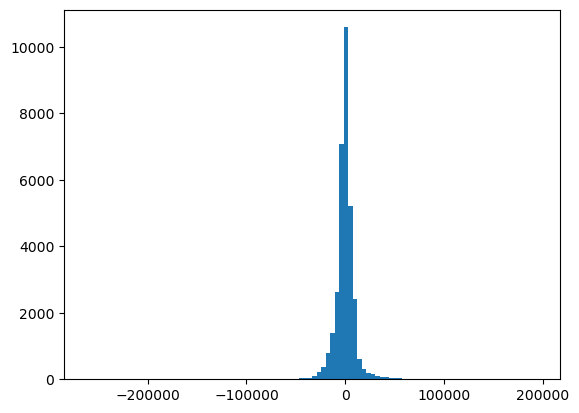

In [66]:
# plot a histogram of the results
plt.figure()
plt.hist(m3_resids, bins=100)
plt.show()

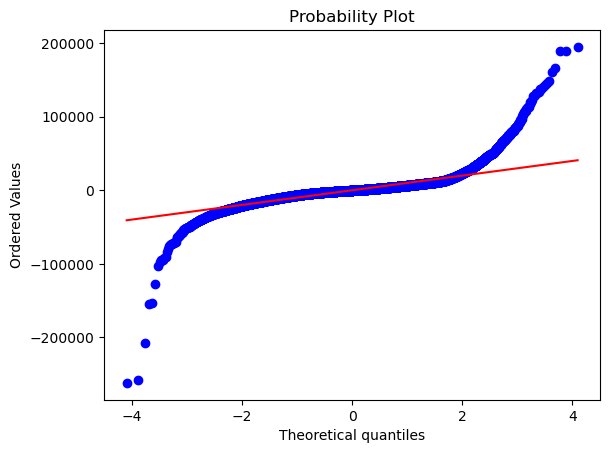

In [67]:
plt.figure()
stats.probplot(m3_resids, dist='norm', plot=plt)
plt.show()

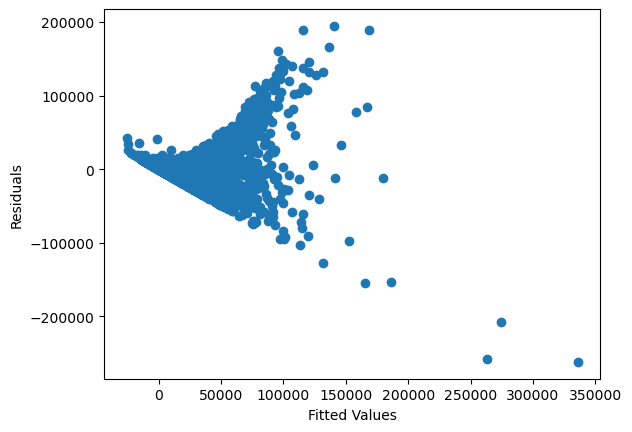

In [68]:
# check for homoscedasticity
plt.figure()
plt.scatter(m3_fittedvals, m3_resids)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Model 4: More Advance Semantic Feature Selection

The previous model features were semantically filtered through removing independent columns that were either irrelevant or components of a large variable group. 

This next selection, will target columns which are too obviously predictive of the target variable. Meaning, columns whose inclusion and subsequent high coefficient with the target variable is not a surprise and thus not a particularly useful insight to have.

The columns to now be dropped are:
- Overall Rating	
- Count Reservation Days LTM	
- Occupancy Rate LTM	
- Number of Bookings LTM	
- Average Daily Rate (Native)	

Features relating to occupancy rate are expected to predict a higher annual revenue; it would be strange for an unoccupied property to make a significant amount of money. Then the 'Average Daily Rate', similarly to the occupancy columns, a property that charges more should in thoery make a larger sum of money (unless it has the reserve effect of being overpriced for the quality and thus a deterrent, this will be explored further). 

In [55]:
X_m4 = X_m3.drop(columns = ['Overall Rating', 'Count Reservation Days LTM', 'Occupancy Rate LTM',
                           'Number of Bookings LTM', 'Average Daily Rate (Native)'])

In [56]:
# 1. Instantiate model
linreg = sm.OLS(y, X_m4)

# 2. Fit model
linreg_results = linreg.fit()

# Look at model summary
linreg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Annual Revenue LTM (Native)   R-squared:                       0.275
Model:                                     OLS   Adj. R-squared:                  0.274
Method:                          Least Squares   F-statistic:                     538.5
Date:                         Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                                 22:59:04   Log-Likelihood:            -3.6593e+05
No. Observations:                        32678   AIC:                         7.319e+05
Df Residuals:                            32654   BIC:                         7.321e+05
Df Model:                                   23                                         
Covariance Type:                     nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -1.579e+04   1075.628    -14.679      0.000   -1.79e+04   -1.37e+04
Number of Reviews                   59.1473      1.838     32.181      0.000      55.545      62.750
Bedrooms                           971.1814    190.682      5.093      0.000     597.437    1344.925
Bathrooms                         3107.9821    173.133     17.951      0.000    2768.635    3447.329
Max Guests                        2274.7692     86.642     26.255      0.000    2104.947    2444.592
Airbnb Superhost                  4746.1175    240.647     19.722      0.000    4274.441    5217.793
Cleaning Fee (Native)               73.5752      2.999     24.530      0.000      67.696      79.454
Extra People Fee(Native)           -39.0887     12.643     -3.092      0.002     -63.869     -14.308
Minimum Stay                       -76.5031      5.655    -13.529      0.000     -87.587     -65.420
Airbnb Accuracy Rating             479.2436    160.938      2.978      0.003     163.800     794.687
Airbnb Location Rating            2360.8402    147.242     16.034      0.000    2072.240    2649.440
Airbnb Value Rating              -1555.4980    154.091    -10.095      0.000   -1857.522   -1253.474
Pets Allowed                      1095.2808    296.154      3.698      0.000     514.808    1675.754
Cancellation Policy_medium         763.3615    262.403      2.909      0.004     249.043    1277.680
Cancellation Policy_no_policy    -1497.7263    305.577     -4.901      0.000   -2096.669    -898.784
Cancellation Policy_super_strict  2.507e+04   1917.599     13.074      0.000    2.13e+04    2.88e+04
Checkout Time_afternoon            503.5646    403.626      1.248      0.212    -287.557    1294.687
Checkout Time_evening             1542.1705   2382.544      0.647      0.517   -3127.703    6212.044
Checkout Time_late               -2043.1074   3479.937     -0.587      0.557   -8863.912    4777.697
Checkout Time_morning             3850.9507    336.856     11.432      0.000    3190.701    4511.201
Checkout Time_very_early          -673.7250   4912.113     -0.137      0.891   -1.03e+04    8954.197
Listing Type_entire_home          -740.7134    485.424     -1.526      0.127   -1692.162     210.735
Listing Type_hotel_room           3007.7741   1035.116      2.906      0.004     978.910    5036.639
Listing Type_private_room        -4943.3490    485.894    -10.174      0.000   -5895.719   -3990.979
Listing Type_shared_room         -1.311e+04   1217.452    -10.770      0.000   -1.55e+04   -1.07e+04
==============================================================================
Omnibus:                    22408.490   Durbin-Watson:                   1.59

The removal of the columns which are obviously predictive of the annual revenue has caused the R-squared value to drop significantly, to a value of 0.275. This is a very low value and indicates the variance of the independent columns are only able to predict 27.5% of the variance in the target column - a low performing model, but still performing to some degree.

### Model 5: Train Test Split Model
This next model will use a train test split, to see how effective a machine learning linear regression model can be at predicting the target variable. 

The features used in 'model 3' will be used for this model (X_m3).

In [69]:
# importing the required packages 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [70]:
# splitting our data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X_m3, y, test_size=0.33, random_state=42)

In [72]:
# reset index for X train and test datasets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

The indexes must be reset for the y train and test datasets. This involves having to convert the series data into a dataframe for the conversation to occur, with the dataframe then being returned to a series format:

In [74]:
# reset index for y train and test datasets
# convert to dataframe
y_train = y_train.to_frame()
y_test = y_test.to_frame()

# reset index
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# return y datasets to series format
y_train = y_train.squeeze()
y_test = y_test.squeeze()

The linear regression model can now be made:

In [89]:
# 1.Instantiate the model
linreg_tt = LinearRegression()

# 2. Fit the model
linreg_tt.fit(X_train, y_train)

# 3. Score training model
r2_train = linreg_tt.score(X_train, y_train)

print(f"The R-squared value of the training model is {r2_train}")

The R-squared value of the training model is 0.6877892519752109


The training model will now be used on the test dataset, to see how it does predicting the unknown target variable:

In [91]:
# 3. Predictions based on the test set
y_pred = linreg_tt.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"The mean squared error is: {mse}")
print(f"The R-squared value for the test set is: {r2_test}")

The mean squared error is: 127918138.70584115
The R-squared value for the test set is: 0.6965336633474206
